### Questao 1. Explique com as suas palavras o que é e quais são os objetivos de uma tarefa de clusterização. Quais são suas vantagens e quais são suas maiores dificuldades?

Clusterização é em essencia agrupar coisas, dentro do contexto de machine learning a clusterização tem como definição organizar elementos por similaridade, elementos que tenham alguma semelhança em seus dados que são a colunas e linhas. Dessa forma, a clusterização se baseia na distância construida a partir dos vetores que representam os elementos de dados e tem como objetivo ao realizar isso principalmente entender os agrupamentos que poderiam ser formados, identificando grupos e melhorando a interpretabilidade dos dados, além de identificar padrões importantes para o negócio. Assim sendo, é uma análise não supervisionada ou seja, ela pode surpreender ao gerar insights inesperados.


### questao 2. Aplique o k-means na base de dados de comparação de produtos da ShopMania



In [2]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 22.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import mglearn
from sklearn.feature_extraction import text


def baixar_csv_github(url):
    print(f"Baixando arquivo de {url}...")
    if 'github.com' in url and '/blob/' in url:
        raw_url = url.replace('github.com', 'raw.githubusercontent.com').replace('/blob/', '/')
    else:
        raw_url = url
    response = requests.get(raw_url)
    if response.status_code == 200:
        return pd.read_csv(StringIO(response.text))
    else:
        raise Exception(f"Erro ao baixar arquivo: {response.status_code}")


url_sonar = "https://github.com/ecrseer/machine-learnin/blob/main/clusters/shopmania.csv"
df = baixar_csv_github(url_sonar)


df = df.sample(n=38420, random_state=42).reset_index(drop=True)

def vetorizar(vetorizador, atributo):
    atributo_vec = vetorizador.fit_transform(atributo)
    atributo_vec_df = pd.DataFrame(
        atributo_vec.toarray(),
        columns=vetorizador.get_feature_names_out()
    )
    return atributo_vec_df

print("Arquivo baixado! iniciano vetorizando textos em numero...")
df.columns = ["id", "product_name", "some_number", "category"]
atributos_tfidf = vetorizar(text.TfidfVectorizer(stop_words="english"), df['product_name'])

print("vetorizado! inicnando o KMeans...")
kmeans = KMeans(n_clusters=3, random_state=0)


X = atributos_tfidf.values

kmeans.fit(X)
y_pred = kmeans.predict(X)

print("Plotando clusters...")

plt.figure(figsize=(8,6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y_pred,
    cmap=mglearn.cm2,
    s=60,
    edgecolor='k'
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c="red",
    marker="^",
    s=200,
    edgecolor="k",
    label="Centroids"
)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("KMeans Clustering with plt.scatter")
plt.legend()
plt.show()


Baixando arquivo de https://github.com/ecrseer/machine-learnin/blob/main/clusters/shopmania.csv...
Arquivo baixado! iniciano vetorizando textos em numero...
vetorizado! inicnando o KMeans...


### Questao 3. De acordo com o que estudamos em sala de aula, descreva e explique quais as situações em que o algoritmo k-means falha, ou seja, quais situações em que a tarefa executada pelo algoritmo não chega a agrupamentos satisfatórios, capazes de representar adequadamente os dados no dataset.


Uma das situações em que o algoritmo K means falha é na presença de muitos dados que são irrelevantes ou seja,outliers ou ruídos --- pertubações que afetam a concentração de dados em torno da média, isso dificulta formar núcleos na maioria dos algoritmos que visam capturar aspectos mais importantes dos dados originais como o K means.

Além disso, outro caso em que o algoritmo K means é falho é quando o número de clusters definido não é razoável com o dataset, existe uma fragilidade do procedimento K Means em si que nesses casos o algoritmo não consegue formar insights relevantes.

Outra situação em que o algoritmo K means falha é com dados espalhados ou seja que não são compactados, nesse caso o algoritmo k means geralmente falha, demonstrando um baixo coeficiente de silhueta, isso ocorre porque o algoritmo vetoriza seus agrupamentos com base no raio dos núcleos do centroide, comumente formando circulos. Um exemplo disso é o caso do make_moons que é um dataset artificial que é feito para simular dados espalhados que forma duas luas.



### Questao 4. Explique com as suas palavras como o algoritmo k-means pode ser usado para a quantização vetorial. Ilustre sua explicação aplicando uma quantização sobre o dataset make_blobs, que usamos em sala de aula.


A quantização vetorial trata de grandes espaços multidimensionais  reduzindo-os para um conjunto de dimensões um pouco menor, tornando-os computacionalmente mais "palatável" com objetivo de possibilitar tratar e agrupar todos eles individualmente. A separação de dados usando os centros de cluster como ponto de referência é a forma que o algoritmo K means pode ser usado para a quantização vetorial:


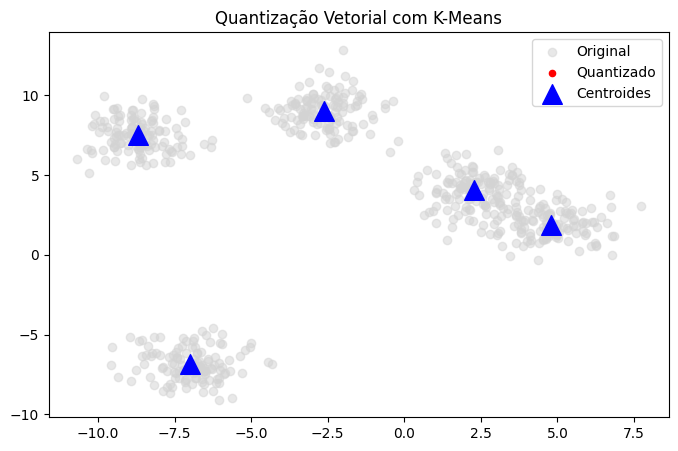

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

random_state=42
X, y = make_blobs(n_samples=600, centers=5, random_state=random_state)
kmeans = KMeans(n_clusters=5, random_state=random_state)
kmeans.fit(X)
X_quantizado = kmeans.cluster_centers_[kmeans.predict(X)]


plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], c='lightgray', label='Original', alpha=0.5)
plt.scatter(X_quantizado[:,0], X_quantizado[:,1], c='red', label='Quantizado', s=20)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='blue', marker='^', s=200, label='Centroides')
plt.legend()
plt.title("Quantização Vetorial com K-Means")
plt.show()